In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz
!pip install pandas-profiling

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.5/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.5/u/import-error

In [7]:
df = pd.read_csv(r'Final_Long_term_health_problem.csv')
df.head()

,Health,Age,Gender,White,Mixed,Asian,African,Others,Region,Disability_Type
0,Very good,Children&Teens,Males,"8,707","2,205","2,938","2,810",651,Camden,Disabled
1,Very good,Adults,Males,"39,791","2,713","9,870","3,756","2,598",Camden,Disabled
2,Very good,Middle aged,Males,"8,175",236,813,539,309,Camden,Disabled
3,Very good,Seniors,Males,"4,740",66,324,199,86,Camden,Disabled
4,Fair,Children&Teens,Males,177,83,148,100,30,Camden,Disabled


In [8]:
my_report = sweetviz.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [20]:
### create a whole report in form of HTML file
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Health           288 non-null    object
 1   Age              288 non-null    object
 2   Gender           288 non-null    object
 3   White            288 non-null    object
 4   Mixed            288 non-null    object
 5   Asian            288 non-null    object
 6   African          288 non-null    object
 7   Others           288 non-null    object
 8   Region           288 non-null    object
 9   Disability_Type  288 non-null    object
dtypes: object(10)
memory usage: 22.6+ KB


In [26]:
df.describe()

,Health,Age,Gender,White,Mixed,Asian,African,Others,Region,Disability_Type
count,288,288,288,288,288,288,288,288,288,288
unique,3,4,2,283,259,279,265,253,3,4
top,Very good,Children&Teens,Males,60,8,30,31,6,Camden,Disabled
freq,96,72,144,4,5,2,3,4,96,72


In [104]:
merged_data = pd.read_csv('health_problems_ethnic_merged.csv')
merged_data.head()

,region,age,gender,ethnic,health,count,disability_type
0,camden,youth,male,white,good,8707,disabled
1,camden,youth,male,mixed,good,39791,disabled
2,camden,youth,male,asian,good,8175,disabled
3,camden,youth,male,black,good,4740,disabled
4,camden,youth,male,other,good,177,disabled


In [38]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   region           1440 non-null   object
 1   age              1440 non-null   object
 2   gender           1440 non-null   object
 3   ethnic           1440 non-null   object
 4   health           1440 non-null   object
 5   count            1440 non-null   int64 
 6   disability_type  1440 non-null   object
dtypes: int64(1), object(6)
memory usage: 78.9+ KB


In [42]:
merged_data.describe()

,count
count,1.440000e+03
mean,8.394721e+04
std,5.922913e+05
min,0.000000e+00
25%,7.775000e+01
50%,8.460000e+02
75%,6.259500e+03
max,9.740029e+06


In [44]:
merged_data.max()

region               greater london
age                           youth
gender                         male
ethnic                        white
health                         good
count                       9740029
disability_type    serverly_limited
dtype: object

In [47]:
merged_data.min()

region               camden
age                   adult
gender               female
ethnic                asian
health                  bad
count                     0
disability_type    disabled
dtype: object

KeyError: "None of [Index(['youth', 'youth', 'youth', 'youth', 'youth', 'adult', 'adult', 'adult',\n       'adult', 'adult',\n       ...\n       'middle aged', 'middle aged', 'middle aged', 'middle aged',\n       'middle aged', 'elderly', 'elderly', 'elderly', 'elderly', 'elderly'],\n      dtype='object', length=1440)] are in the [columns]"

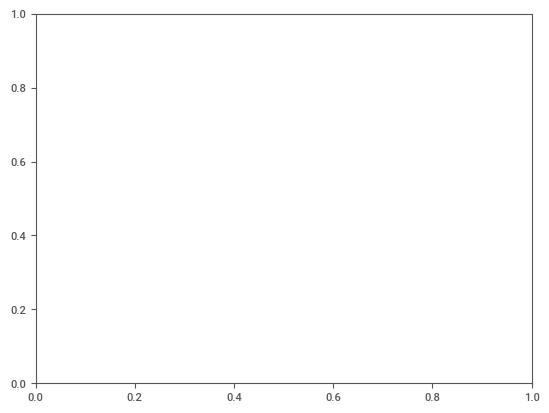

In [67]:
# plt.hist(merged_data['region'],merged_data['count'], bins=merged_data['region'].unique)
merged_data.plot(kind='scatter',x=merged_data['age'], y=merged_data['count'])


In [77]:
# Count occurrences of each unique category in a column
value_count_list = []
for col in merged_data.columns.tolist():
    print(col)
    value_counts = merged_data[col].value_counts()
    value_count_list.append(value_counts)
    print(value_counts)
    print()


region
camden            480
greater london    480
england&wales     480
Name: region, dtype: int64

age
youth          360
adult          360
middle aged    360
elderly        360
Name: age, dtype: int64

gender
male      720
female    720
Name: gender, dtype: int64

ethnic
white    288
mixed    288
asian    288
black    288
other    288
Name: ethnic, dtype: int64

health
good    480
fair    480
bad     480
Name: health, dtype: int64

count
18      15
3       14
5       13
38      12
6       12
        ..
1134     1
7571     1
3832     1
2395     1
137      1
Name: count, Length: 953, dtype: int64

disability_type
disabled            360
serverly_limited    360
limited             360
not_limited         360
Name: disability_type, dtype: int64



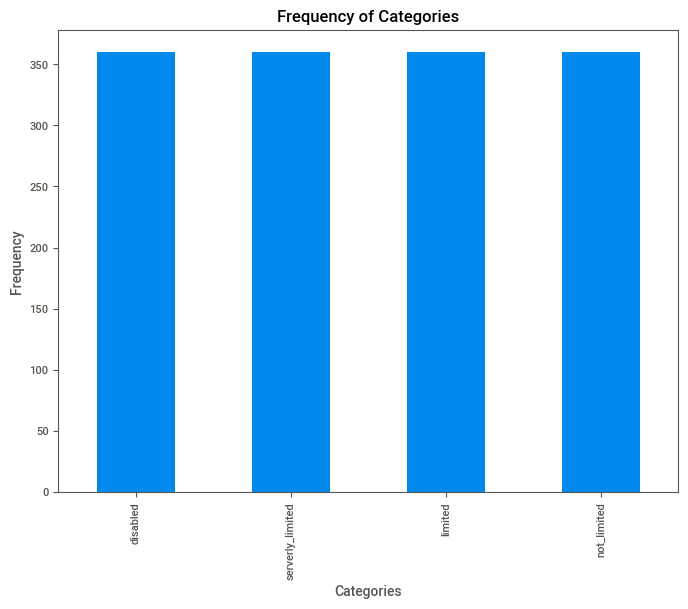

In [85]:
# Visualize the frequency of each category using a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

value_count_list[6].plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Categories')
plt.show()


In [90]:
# Identify the most frequent category in a column
mode_value = merged_data[''].mode()
print("Mode:", mode_value)


KeyError: ''

In [108]:
#Mean and Median of count
print("Mean of count", merged_data['count'].mean())
print("Mean of total disabled people", merged_data[merged_data['disability_type']=='disabled']['count'].mean())
print("Mean of total severely limited people", merged_data[merged_data['disability_type']=='serverly_limited']['count'].mean())
print("Mean of total  limited people", merged_data[merged_data['disability_type']=='limited']['count'].mean())
print("Mean of total not limited people", merged_data[merged_data['disability_type']=='not_limited']['count'].mean())


Mean of count 83947.21111111112
Mean of total disabled people 286468.3861111111
Mean of total severely limited people 18722.53888888889
Mean of total  limited people 20651.119444444445
Mean of total not limited people 9946.8


In [111]:
print("Mean of total disabled people in camden", merged_data[merged_data['region']=='camden']['count'].mean())
print("Mean of total disabled people in greater london", merged_data[merged_data['region']=='greater london']['count'].mean())
print("Mean of total disabled people in england and wales", merged_data[merged_data['region']=='england&wales']['count'].mean())

Mean of total disabled people in camden 918.075
Mean of total disabled people in greater london 17273.925
Mean of total disabled people in england and wales 233649.63333333333


In [112]:
camden            480
greater london    480
england&wales     480

merged_data.iloc[500:600,:]

SyntaxError: invalid syntax (4209017845.py, line 1)

In [151]:
# Count the occurrences and proportions of categories
total_count = np.sum(merged_data['count'])
print(total_count)
for col in merged_data.columns:
    print(col)
    
    for val in merged_data[col].unique():
        
        count = merged_data[merged_data[col]==val]['count'].sum()
        relative_frequencies = count/total_count
        total += relative_frequencies
        print(val)
        print("\nCount:", count)
        print("Relative Frequencies:", relative_frequencies,"\n")
        
        


120883984
region
camden

Count: 440676
Relative Frequencies: 0.003645445702716085 

greater london

Count: 8291484
Relative Frequencies: 0.06859042633803333 

england&wales

Count: 112151824
Relative Frequencies: 0.9277641279592506 

age
youth

Count: 50261443
Relative Frequencies: 0.41578248281426594 

adult

Count: 14506030
Relative Frequencies: 0.11999960226327418 

middle aged

Count: 10301046
Relative Frequencies: 0.08521431590143488 

elderly

Count: 45815465
Relative Frequencies: 0.379003599021025 

gender
male

Count: 63429100
Relative Frequencies: 0.5247105356818815 

female

Count: 57454884
Relative Frequencies: 0.4752894643181184 

ethnic
white

Count: 15921701
Relative Frequencies: 0.13171059120619322 

mixed

Count: 38858080
Relative Frequencies: 0.32144936586471207 

asian

Count: 38022854
Relative Frequencies: 0.3145400469263157 

black

Count: 18559243
Relative Frequencies: 0.15352937904495273 

other

Count: 9522106
Relative Frequencies: 0.07877061695782628 

health
go

218

Count: 436
Relative Frequencies: 3.606763986203499e-06 

118

Count: 236
Relative Frequencies: 1.9522850934496004e-06 

109

Count: 218
Relative Frequencies: 1.8033819931017496e-06 

2296

Count: 4592
Relative Frequencies: 3.798683537762951e-05 

4316

Count: 8632
Relative Frequencies: 7.140730901125826e-05 

512

Count: 1024
Relative Frequencies: 8.470931930899962e-06 

368

Count: 736
Relative Frequencies: 6.088482325334347e-06 

589

Count: 1178
Relative Frequencies: 9.744880678320463e-06 

2406

Count: 4812
Relative Frequencies: 3.98067621596588e-05 

252

Count: 504
Relative Frequencies: 4.169286809739825e-06 

258

Count: 516
Relative Frequencies: 4.268555543305058e-06 

89

Count: 178
Relative Frequencies: 1.4724862145509698e-06 

72

Count: 144
Relative Frequencies: 1.191224802782807e-06 

34

Count: 68
Relative Frequencies: 5.625228235363255e-07 

49

Count: 98
Relative Frequencies: 8.106946574494103e-07 

579

Count: 1158
Relative Frequencies: 9.579432789045073e-06 

235

79936

Count: 79936
Relative Frequencies: 0.0006612621238558782 

239007

Count: 239007
Relative Frequencies: 0.001977160183602155 

170971

Count: 170971
Relative Frequencies: 0.001414339553865134 

329667

Count: 329667
Relative Frequencies: 0.0027271354656874976 

32950

Count: 32950
Relative Frequencies: 0.00027257539758120483 

225741

Count: 225741
Relative Frequencies: 0.0018674185986457892 

306897

Count: 306897
Relative Frequencies: 0.002538773043747466 

596897

Count: 596897
Relative Frequencies: 0.004937767438240619 

5399

Count: 5399
Relative Frequencies: 4.4662657709891494e-05 

60461

Count: 60461
Relative Frequencies: 0.0005001572416739673 

75319

Count: 75319
Relative Frequencies: 0.0006230684786166545 

70924

Count: 70924
Relative Frequencies: 0.0005867113049483876 

4033067

Count: 4033067
Relative Frequencies: 0.03336312112281144 

9420424

Count: 9420424
Relative Frequencies: 0.07792946334396127 

3139196

Count: 3139196
Relative Frequencies: 0.0259686676110873

21963

Count: 21963
Relative Frequencies: 0.00018168659960776938 

620

Count: 620
Relative Frequencies: 5.1288845675370855e-06 

8052

Count: 8052
Relative Frequencies: 6.660932022227196e-05 

7875

Count: 7875
Relative Frequencies: 6.514510640218477e-05 

4727

Count: 4727
Relative Frequencies: 3.910360863023839e-05 

482223

Count: 482223
Relative Frequencies: 0.003989138875502316 

1048977

Count: 1048977
Relative Frequencies: 0.008677551527421532 

132275

Count: 132275
Relative Frequencies: 0.0010942309776951096 

28412

Count: 28412
Relative Frequencies: 0.00023503527150461884 

9494

Count: 9494
Relative Frequencies: 7.853811303902757e-05 

68118

Count: 68118
Relative Frequencies: 0.0005634989660830503 

29483

Count: 29483
Relative Frequencies: 0.00024389500597531597 

11528

Count: 11528
Relative Frequencies: 9.536416337833472e-05 

1032

Count: 1032
Relative Frequencies: 8.537111086610117e-06 

4900

Count: 4900
Relative Frequencies: 4.0534732872470516e-05 

2262

Count: 22